In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [4]:
yield_data = pd.read_excel("2021 Yield.xlsx")

In [5]:
yield_data.head()

,Plot Number,Block,Treatment,Simp. Treatment,Yield (avg; bu/ac),Treatment Description,Short Trt Description
0,1,2,2S,2.0,75.328418,"Corn/Soy, Spring Manure","CS, SM"
1,2,2,6S,6.0,77.482016,"Corn/Soy, Fall Manure","CS, FM"
2,3,2,1C,1.0,232.173281,"Corn/Soy, Spring UAN","CS, SUAN"
3,4,2,3.1,3.1,231.645855,Continuous Corn,CC
4,5,2,4.1,4.1,208.940519,Continuous Corn + PGC,CC + PGC


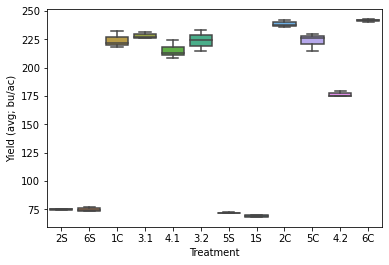

In [6]:
ax = sns.boxplot(x = "Treatment", y = "Yield (avg; bu/ac)", data = yield_data)
plt.savefig('all_yield_box.png')

Including all of the yield data on the same plot doesn't make sense because some treatments are soybeans and some are corn

In [7]:
yield_data.dtypes

Plot Number                int64
Block                      int64
Treatment                 object
Simp. Treatment          float64
Yield (avg; bu/ac)       float64
Treatment Description     object
Short Trt Description     object
dtype: object

In [8]:
yield_data['Treatment'] = yield_data['Treatment'].astype('string')
yield_data.dtypes

Plot Number                int64
Block                      int64
Treatment                 string
Simp. Treatment          float64
Yield (avg; bu/ac)       float64
Treatment Description     object
Short Trt Description     object
dtype: object

Filtering out the soybean treatment data

In [9]:
corn_only = yield_data[yield_data['Treatment'].str.contains('1C|2C|3.1|3.2|4.1|4.2|5C|6C')]
corn_only.head()

,Plot Number,Block,Treatment,Simp. Treatment,Yield (avg; bu/ac),Treatment Description,Short Trt Description
2,3,2,1C,1.0,232.173281,"Corn/Soy, Spring UAN","CS, SUAN"
3,4,2,3.1,3.1,231.645855,Continuous Corn,CC
4,5,2,4.1,4.1,208.940519,Continuous Corn + PGC,CC + PGC
5,6,2,3.2,3.2,223.988531,Continuous Corn + 30 in ISC,CC + 30ISC
10,11,2,2C,2.0,237.683989,"Corn/Soy, Spring Manure","CS, SM"


In [10]:
len(corn_only)

24

Making sure all of the treatments were included. There are 8 treatments with corn growing and each treatment has three reps, so 24 is correct. 

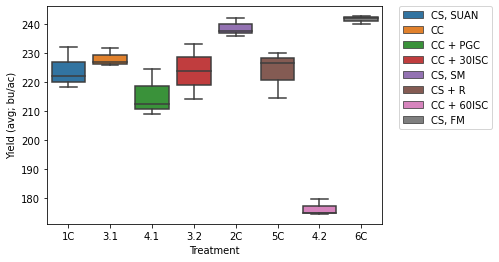

In [11]:
ax = sns.boxplot(x = "Treatment", y = "Yield (avg; bu/ac)", data = corn_only, hue = 'Short Trt Description', dodge = False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('corn_yield_box.jpg', bbox_inches='tight')

In [12]:
soy_only = yield_data[yield_data['Treatment'].str.contains('1S|2S|5S|6S')]
soy_only.head()

,Plot Number,Block,Treatment,Simp. Treatment,Yield (avg; bu/ac),Treatment Description,Short Trt Description
0,1,2,2S,2.0,75.328418,"Corn/Soy, Spring Manure","CS, SM"
1,2,2,6S,6.0,77.482016,"Corn/Soy, Fall Manure","CS, FM"
6,7,3,2S,2.0,75.667936,"Corn/Soy, Spring Manure","CS, SM"
7,8,3,5S,5.0,71.839370,Corn/Soy + Rye,CS + R
8,9,2,5S,5.0,72.610892,Corn/Soy + Rye,CS + R


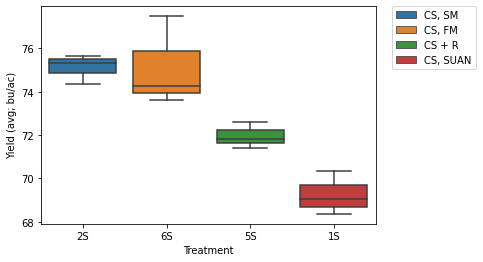

In [13]:
ax = sns.boxplot(x = "Treatment", y = "Yield (avg; bu/ac)", data = soy_only, hue = 'Short Trt Description', dodge = False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('soy_yield_box.jpg', bbox_inches='tight')

In [18]:
corn_only = corn_only.rename(columns={"Yield (avg; bu/ac)": "Yield"})

In [19]:
corn_only

,Plot Number,Block,Treatment,Simp. Treatment,Yield,Treatment Description,Short Trt Description
2,3,2,1C,1.0,232.173281,"Corn/Soy, Spring UAN","CS, SUAN"
3,4,2,3.1,3.1,231.645855,Continuous Corn,CC
4,5,2,4.1,4.1,208.940519,Continuous Corn + PGC,CC + PGC
5,6,2,3.2,3.2,223.988531,Continuous Corn + 30 in ISC,CC + 30ISC
10,11,2,2C,2.0,237.683989,"Corn/Soy, Spring Manure","CS, SM"
11,12,2,5C,5.0,229.933270,Corn/Soy + Rye,CS + R
12,13,2,4.2,4.2,179.638775,Continuous Corn + 60in ISC,CC + 60ISC
13,14,2,6C,6.0,239.973125,"Corn/Soy, Fall Manure","CS, FM"
16,17,1,5C,5.0,214.635798,Corn/Soy + Rye,CS + R
17,18,1,3.1,3.1,225.744819,Continuous Corn,CC


<AxesSubplot:title={'center':'Mean Yield of Corn Treatments'}, xlabel='Treatment'>

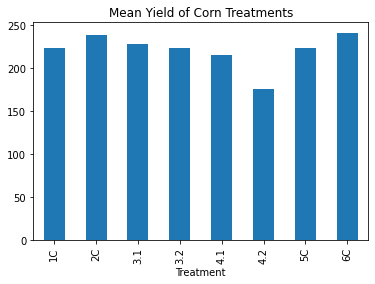

In [28]:
corn_only.groupby('Treatment')['Yield'].describe()['mean'].plot(kind='bar', title = 'Mean Yield of Corn Treatments')

In [50]:
corn_means = pd.DataFrame(corn_only.groupby('Treatment')['Yield'].describe()['mean'])
corn_means = corn_means.reset_index()
corn_means.head()

,Treatment,mean
0,1C,224.195358
1,2C,238.538890
2,3.1,228.115141
3,3.2,223.808229
4,4.1,215.369255


In [52]:
print(corn_means.columns)

Index(['Treatment', 'mean'], dtype='object')


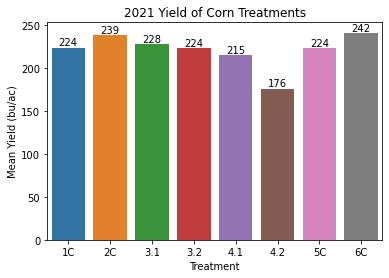

In [61]:
ax = sns.barplot(x = 'Treatment', y = 'mean', data = corn_means)
ax.set_title('2021 Yield of Corn Treatments')
ax.set(xlabel='Treatment', ylabel='Mean Yield (bu/ac)')

#for annotating 
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
        
plt.savefig('corn_bar.jpg', bbox_inches='tight')

In [22]:
corn_formula = 'Yield ~C(Block)+C(Treatment)+C(Block):C(Treatment)'
model = ols(corn_formula, corn_only).fit()
aov_table = anova_lm(model, typ = 2)
print(aov_table)

TypeError: Cannot interpret 'StringDtype' as a data type

In [24]:
corn_only.dtypes

Plot Number                int64
Block                      int64
Treatment                 string
Simp. Treatment          float64
Yield                    float64
Treatment Description     object
Short Trt Description     object
dtype: object

https://medium.com/budding-data-scientist/data-analytics-using-python-part-6-9e740a1dd681